In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [22]:
data = pd.read_csv('data/phoneme.csv')
print(data)

# TODO 
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.
train = data.loc[data.speaker.str.contains("train")]
y_train = train.loc[:,"g"]
X_train = train.drop(['row.names', 'g', 'speaker'], axis=1)

test = data.loc[data.speaker.str.contains("test")]
y_test = test.loc[:,"g"]
X_test = test.drop(['row.names', 'g', 'speaker'], axis=1)

      row.names       x.1       x.2       x.3       x.4       x.5       x.6  \
0             1   9.85770   9.20711   9.81689   9.01692   9.05675   8.92518   
1             2  13.23079  14.19189  15.34428  18.11737  19.53875  18.32726   
2             3  10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   
3             4  10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   
4             5  12.96705  13.69454  14.91182  18.22292  18.45390  17.25760   
...         ...       ...       ...       ...       ...       ...       ...   
4504       4505  11.38394  10.21040  16.32658  18.30125  16.91804  10.90029   
4505       4506  12.01774  11.86761  16.34707  18.05214  15.97599  12.86022   
4506       4507  12.30174  12.40383   9.06497  12.43750  13.48388  13.52034   
4507       4508   8.39388   9.84770  16.24534  17.35311  14.80537  12.72429   
4508       4509   8.14032   9.93753  16.30187  17.31425  14.40116  13.52353   

           x.7       x.8       x.9  ...     x.249  

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [23]:
# TODO
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

# train error
pred_train=model_lda.predict(X_train)
print(classification_report(y_train, pred_train))
print("Train error ", (1-np.mean(pred_train == y_train)))

print("\n")
# test error
pred_test=model_lda.predict(X_test)
print(classification_report(y_test, pred_test))
print("Test Error ", (1-np.mean(pred_test == y_test)))

              precision    recall  f1-score   support

          aa       0.84      0.82      0.83       519
          ao       0.88      0.89      0.88       759
         dcl       1.00      0.98      0.99       562
          iy       0.99      1.00      0.99       852
          sh       1.00      1.00      1.00       648

    accuracy                           0.94      3340
   macro avg       0.94      0.94      0.94      3340
weighted avg       0.94      0.94      0.94      3340

Train error  0.05598802395209579


              precision    recall  f1-score   support

          aa       0.77      0.73      0.75       176
          ao       0.83      0.85      0.84       263
         dcl       0.99      0.97      0.98       195
          iy       0.98      0.99      0.99       311
          sh       1.00      1.00      1.00       224

    accuracy                           0.92      1169
   macro avg       0.91      0.91      0.91      1169
weighted avg       0.92      0.92      0.9

### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

['aa', 'ao', 'dcl', 'iy', 'sh']


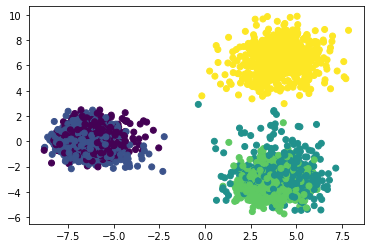

In [24]:
# TODO

lda_c2 = LinearDiscriminantAnalysis(n_components=2)
X_c2 = lda_c2.fit(X_train, y_train).transform(X_train)
phenomes = list((np.unique(y_train)))
print(phenomes)
colors = [phenomes.index(y) for y in y_train]
plt.scatter(X_c2[:,0], X_c2[:,1], c=colors)
plt.show()

### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [25]:
# TODO

boolList_train = y_train.str.contains('aa|ao')
y_train_twoph = y_train[boolList_train]
X_train_twoph = X_train[boolList_train]

boolList_test = y_test.str.contains('aa|ao')
y_test_twoph = y_test[boolList_test]
X_test_twoph = X_test[boolList_test]

model_lda_twoph = lda.fit(X_train_twoph, y_train_twoph)

# train error
pred_train_lda_twoph = model_lda_twoph.predict(X_train_twoph)
print(classification_report(y_train_twoph, pred_train_lda_twoph))
print("Train error ", (1-np.mean(pred_train_lda_twoph == y_train_twoph)))

print("\n")
# test error
pred_test_lda_twoph = model_lda_twoph.predict(X_test_twoph)
print(classification_report(y_test_twoph, pred_test_lda_twoph))
print("Test error ", (1-np.mean(pred_test_lda_twoph == y_test_twoph)))

              precision    recall  f1-score   support

          aa       0.89      0.85      0.87       519
          ao       0.90      0.93      0.91       759

    accuracy                           0.89      1278
   macro avg       0.89      0.89      0.89      1278
weighted avg       0.89      0.89      0.89      1278

Train error  0.10641627543035992


              precision    recall  f1-score   support

          aa       0.76      0.69      0.72       176
          ao       0.80      0.85      0.83       263

    accuracy                           0.79       439
   macro avg       0.78      0.77      0.77       439
weighted avg       0.78      0.79      0.78       439

Test error  0.214123006833713


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [26]:
# TODO
qda = QuadraticDiscriminantAnalysis()

model_qda = qda.fit(X_train, y_train)

# train error
pred_train=model_qda.predict(X_train)
print(classification_report(y_train, pred_train))
print("Train error ", (1-np.mean(pred_train == y_train)))

print("\n")
# test error
pred_test=model_qda.predict(X_test)
print(classification_report(y_test, pred_test))
print("Test error ", (1-np.mean(pred_test == y_test)))

print("\n")
# aa or ao
model_qda_twoph = qda.fit(X_train_twoph, y_train_twoph)

# train error
pred_train_qda_twoph = model_qda_twoph.predict(X_train_twoph)
print(classification_report(y_train_twoph, pred_train_qda_twoph))
print("Train error", (1-np.mean(pred_train_qda_twoph == y_train_twoph)))

print("\n")
# test error
pred_test_qda_twoph = model_qda_twoph.predict(X_test_twoph)
print(classification_report(y_test_twoph, pred_test_qda_twoph))
print("Test error", (1-np.mean(pred_test_qda_twoph == y_test_twoph)))

              precision    recall  f1-score   support

          aa       1.00      1.00      1.00       519
          ao       1.00      1.00      1.00       759
         dcl       1.00      1.00      1.00       562
          iy       1.00      1.00      1.00       852
          sh       1.00      1.00      1.00       648

    accuracy                           1.00      3340
   macro avg       1.00      1.00      1.00      3340
weighted avg       1.00      1.00      1.00      3340

Train error  0.0


              precision    recall  f1-score   support

          aa       0.93      0.15      0.26       176
          ao       0.64      0.98      0.78       263
         dcl       0.99      0.85      0.91       195
          iy       0.90      1.00      0.95       311
          sh       0.98      0.99      0.98       224

    accuracy                           0.84      1169
   macro avg       0.89      0.80      0.78      1169
weighted avg       0.88      0.84      0.81      1169

Tes

Here, LDA is preferred, because it has a lower test error than QDA in both cases when trained with 
either all phonemes or with only ”aa” and ”ao”. This indicates that LDA is better at generalizing. QDA 
models have a train error of 0, which is a strong indicative of overfitting, which explains why they 
perform less good on the test sets.

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [27]:
# TODO 

#LDA
#train
print(confusion_matrix(y_train_twoph, pred_train_lda_twoph), "\n")
#test
print(confusion_matrix(y_test_twoph, pred_test_lda_twoph), "\n")

#QDA
#train
print(confusion_matrix(y_train_twoph, pred_train_qda_twoph), "\n")
#test
print(confusion_matrix(y_test_twoph, pred_test_qda_twoph), "\n")

[[439  80]
 [ 56 703]] 

[[121  55]
 [ 39 224]] 

[[519   0]
 [  0 759]] 

[[ 29 147]
 [  2 261]] 



We can see the confusion matrices shown above for LDA and QDA (train and test aa,ao phenome data). We can consider 1st column as "aa"-prediction and 2nd column as "ao"-prediction and 1st row as "aa"-actual and 2nd row as "ao"-actual. <br>
We can observe that in train LDA, there is 439 correct predictions of "aa" and 703 correct predictions of "ao" while there are some wrong predictions also and similarly in test LDA, there is 121 correct predictions of "aa" and 224 correct prediciton of "ao" with some values of wrong prediction also.<br>
In train QDA, there are all correct predictions and 0 wrong prediction. In test QDA, there are very few correct predicitons of "aa" and good number of prediction for "ao" while there are large number wrong predcitions. 